In [1]:
# Importēt palīgfunkcijas un bibliotēkas

from helpers import parse_gz_files, top_10_predicates

In [2]:
# Iegūt četriniekus klasei ShoppingCenter 2024. gada datu kopā

shopping_center_quads = {}
shopping_center_quads["2024"] = parse_gz_files(["../shopping_center_2024_p1.gz", "../shopping_center_2024_p2.gz"], "ShoppingCenter")


Top 10 predikāti 2024:
<http://www.w3.org/1999/02/22-rdf-syntax-ns#type> 111608 100.0%
<http://schema.org/address> 99934 89.54%
<http://schema.org/url> 97323 87.2%
<http://schema.org/image> 92893 83.23%
<http://schema.org/name> 61935 55.49%
<http://schema.org/geo> 20049 17.96%
<http://schema.org/telephone> 19027 17.05%
<http://schema.org/openingHoursSpecification> 18504 16.58%
<http://schema.org/aggregateRating> 13863 12.42%
<http://schema.org/sameAs> 11546 10.35%


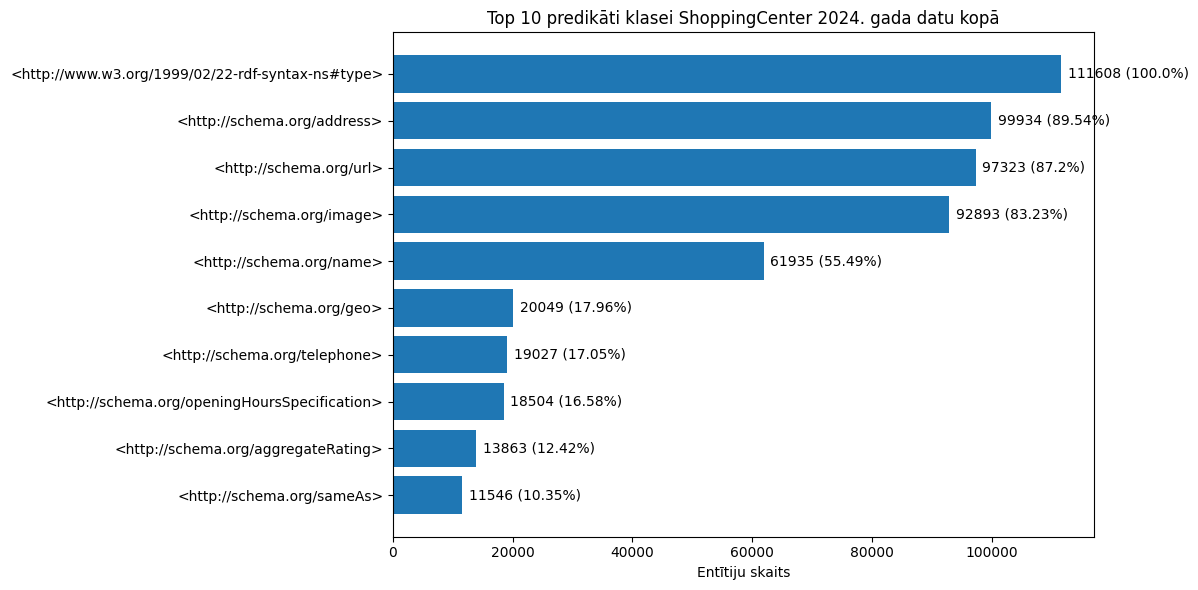

In [3]:
top_10_predicates(shopping_center_quads, 'ShoppingCenter')